In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/car_price_prediction.csv')

In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
df.duplicated().sum()

313

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [ ]:
df['Levy'].value_counts()

Levy
-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64

In [ ]:
df.Levy.replace({'-':'0'},inplace=True)
df['Levy']=df['Levy'].astype(int)

In [ ]:
df['Mileage']= df['Mileage'].str.replace('km','')
df['Mileage'] = df['Mileage'].astype(int)

In [ ]:
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')
df['Engine volume'] = df['Engine volume'].astype(float)

In [ ]:
import datetime
dtime = datetime.datetime.now()
df['Age'] = dtime.year - df['Prod. year']

In [ ]:
df=df.drop(columns=['ID','Doors','Prod. year'])

In [ ]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,10


In [ ]:
df['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

In [ ]:
manufacturer_counts = df['Manufacturer'].value_counts()
manufacturers_to_keep = manufacturer_counts[manufacturer_counts >= 50].index
df = df[df['Manufacturer'].isin(manufacturers_to_keep)]

In [ ]:
df['Model'].value_counts()

Model
Prius           1069
Sonata          1067
Camry            929
Elantra          910
E 350            534
                ... 
A3 4X4             1
100 NX             1
Prius S            1
Vitz i.ll          1
Prius C aqua       1
Name: count, Length: 1386, dtype: int64

In [ ]:
model_counts = df['Model'].value_counts()
models_to_keep = model_counts[model_counts >= 50].index
df = df[df['Model'].isin(models_to_keep)]
df['Model'].value_counts()

Model
Prius        1069
Sonata       1067
Camry         929
Elantra       910
E 350         534
             ... 
GLE 350        55
Outlander      53
Accent         53
C-MAX          52
XV             51
Name: count, Length: 64, dtype: int64

In [ ]:
df.select_dtypes(include='number')

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
0,13328,1399,3.5,186005,6.0,12,14
2,8467,0,1.3,200000,4.0,2,18
3,3607,862,2.5,168966,4.0,0,13
4,11726,446,1.3,91901,4.0,4,10
5,39493,891,2.0,160931,4.0,4,8
...,...,...,...,...,...,...,...
18918,5802,1055,3.5,107800,6.0,12,11
18920,15681,831,2.4,161600,4.0,8,13
18921,26108,836,2.0,116365,4.0,4,14
18922,5331,1288,2.0,51258,4.0,4,17


In [ ]:
categorical_columns= df.select_dtypes(include='object')
categorical_columns

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,Left wheel,Silver
5,HYUNDAI,Santa FE,Jeep,Yes,Diesel,Automatic,Front,Left wheel,White
...,...,...,...,...,...,...,...,...,...
18918,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,Automatic,Rear,Left wheel,Grey
18920,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,Left wheel,Red
18921,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Grey
18922,CHEVROLET,Captiva,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Black


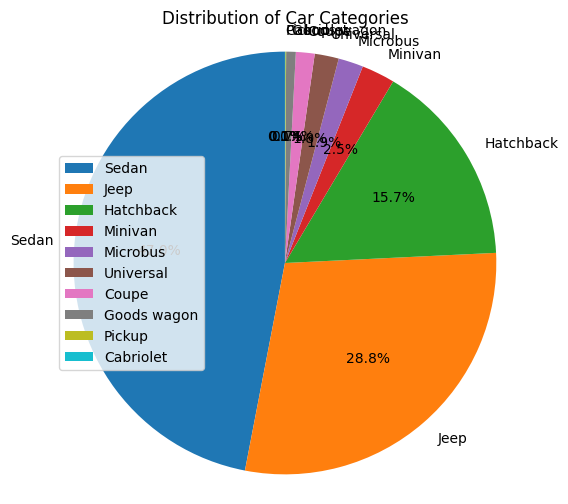

In [ ]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Car Categories')
plt.axis('equal')
plt.legend()
plt.show()

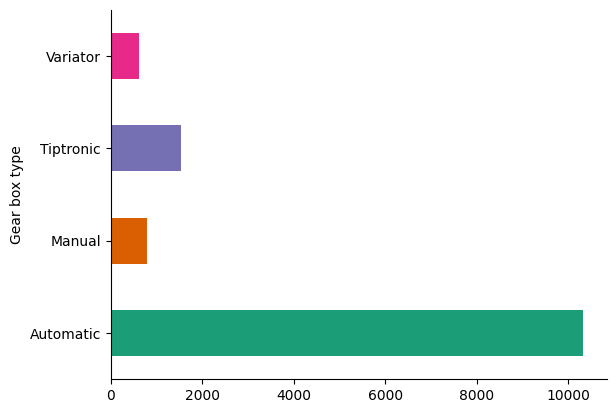

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
categorical_columns.groupby('Gear box type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

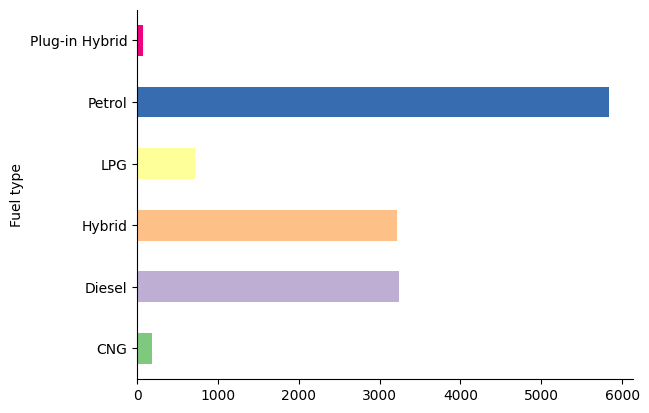

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
categorical_columns.groupby('Fuel type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Accent'))
plt.gca().spines[['top', 'right',]].set_visible(False)

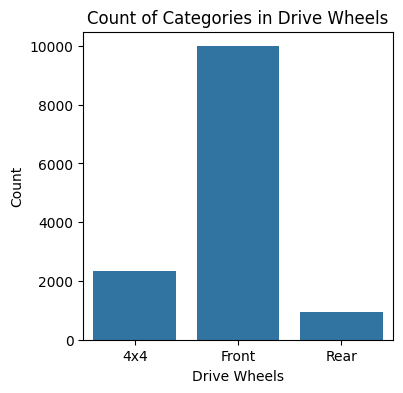

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x=categorical_columns.groupby('Drive wheels').size().index,
            y=categorical_columns.groupby('Drive wheels').size().values)
plt.title('Count of Categories in Drive Wheels')
plt.xlabel('Drive Wheels')
plt.ylabel('Count')
plt.show()

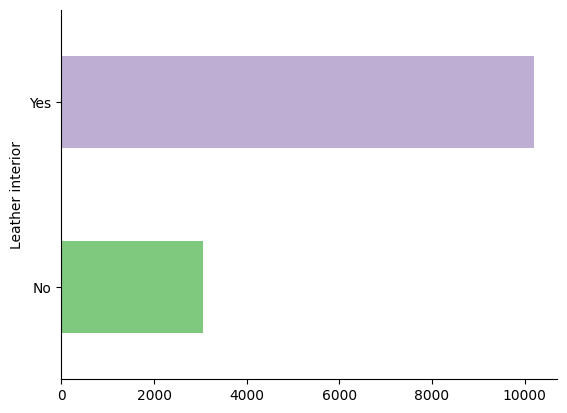

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
categorical_columns.groupby('Leather interior').size().plot(kind='barh', color=sns.palettes.mpl_palette('Accent'))
plt.gca().spines[['top', 'right',]].set_visible(False)

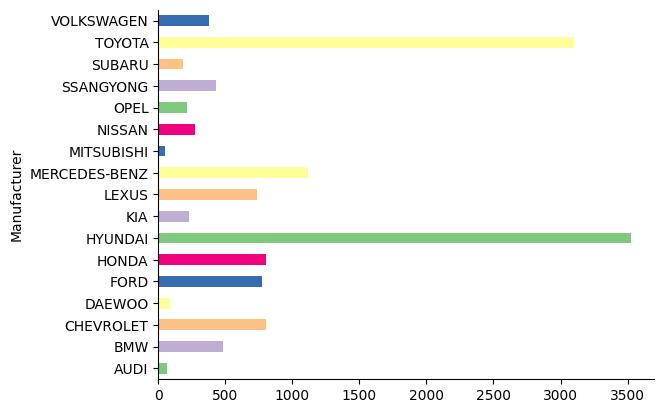

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
categorical_columns.groupby('Manufacturer').size().plot(kind='barh',color=sns.palettes.mpl_palette('Accent'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
categorical_columns = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
for col in categorical_columns:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    encoders[col] = le

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

results = {}

for model_name, model in models.items():
    mse, r2 = evaluate_model(model, x_train_scaled, y_train, x_test_scaled, y_test)
    results[model_name] = {"MSE": mse, "R2 Score": r2}

best_model_name = None
best_mse = float('inf')

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")
    print("-" * 30)

    if metrics['MSE'] < best_mse:
        best_mse = metrics['MSE']
        best_model_name = model_name


Linear Regression:
Mean Squared Error: 168606736.4944
R2 Score: 0.2104
------------------------------
Ridge Regression:
Mean Squared Error: 168605189.1646
R2 Score: 0.2104
------------------------------
Lasso Regression:
Mean Squared Error: 168600268.8020
R2 Score: 0.2104
------------------------------
Decision Tree:
Mean Squared Error: 64983209.6448
R2 Score: 0.6957
------------------------------
Random Forest:
Mean Squared Error: 36893713.2280
R2 Score: 0.8272
------------------------------
Gradient Boosting:
Mean Squared Error: 70295617.0730
R2 Score: 0.6708
------------------------------


<ipython-input-37-5b392c0839c7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(model_names, rotation=45)
<ipython-input-37-5b392c0839c7>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(model_names, rotation=45)


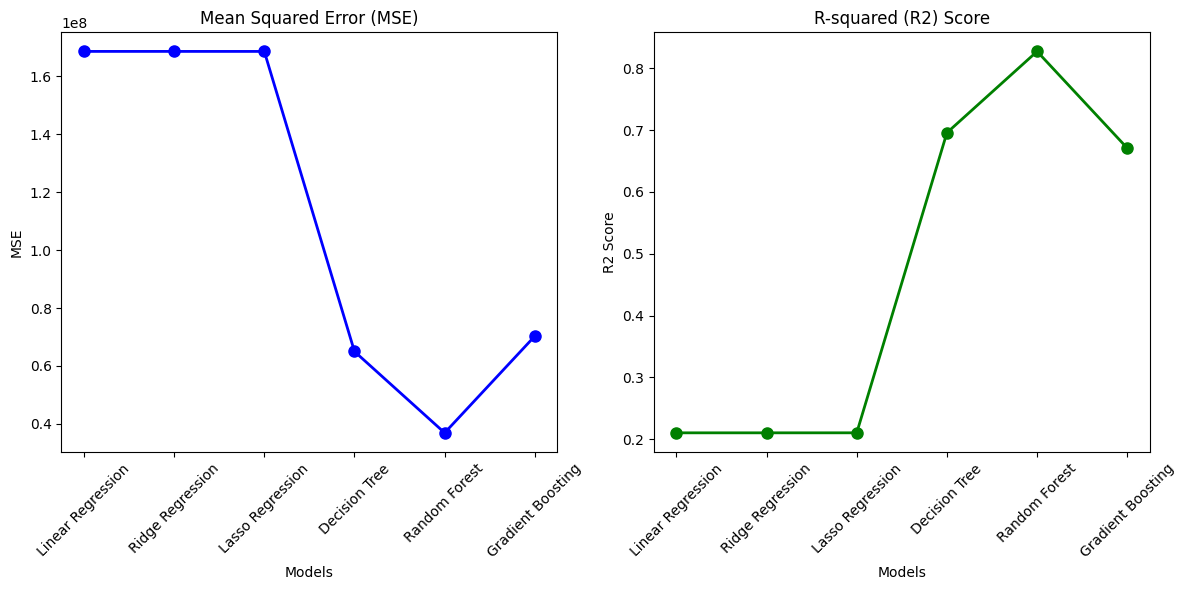

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

model_names = list(results.keys())
mses = [results[name]['MSE'] for name in model_names]
r2_scores = [results[name]['R2 Score'] for name in model_names]

# Plot MSE as a line graph
ax1.plot(model_names, mses, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
ax1.set_title('Mean Squared Error (MSE)')
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE')
ax1.set_xticklabels(model_names, rotation=45)

# Plot R2 Score as a line graph
ax2.plot(model_names, r2_scores, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
ax2.set_title('R-squared (R2) Score')
ax2.set_xlabel('Models')
ax2.set_ylabel('R2 Score')
ax2.set_xticklabels(model_names, rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
print(f"The best model is {best_model_name} with a Mean Squared Error of {best_mse:.4f}")


The best model is Random Forest with a Mean Squared Error of 36893713.2280


In [41]:
import joblib
model = RandomForestRegressor()
model.fit(x_train, y_train)

joblib.dump(model, 'car_price_model.joblib')

for col, encoder in encoders.items():
    joblib.dump(encoder, f'{col}_encoder.joblib')